<a href="https://colab.research.google.com/github/sdave-connexion/web-traffic-forecasting/blob/main/Predicted_Test_using_Holt_Winters_all%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET 



In [ ]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

(67, 1)
             visits
date               
2021-01-22  4122038
2021-01-29  3878332
2021-02-05  4623054
2021-02-12  4888239
2021-02-19  4903506


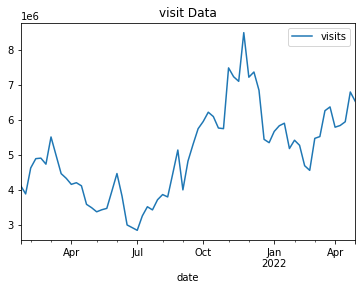

In [ ]:
df = pd.read_csv('/content/train_overall.csv',index_col='date', parse_dates=True)
# finding shape of the dataframe
print(df.shape)
# having a look at the data
print(df.head())
# plotting the original data
df[['visits']].plot(title='visit Data')

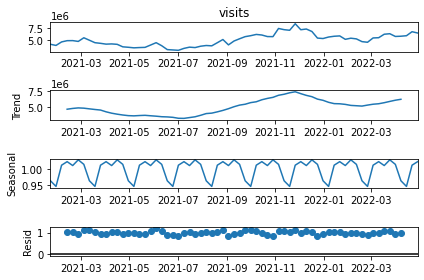

In [ ]:
decompose_result = seasonal_decompose(df['visits'],model='multiplicative',period=7)
decompose_result.plot();

In [ ]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df.index.freq = 'W-FRI'
# Set the value of Alpha and define m (Time Period)
w = 1
alpha = 1/(2*w)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


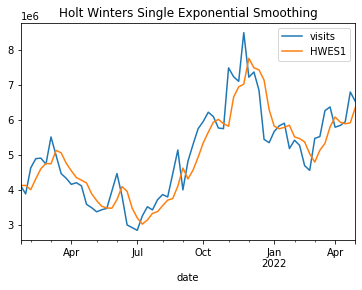

In [ ]:
df['HWES1'] = SimpleExpSmoothing(df['visits']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df[['visits','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


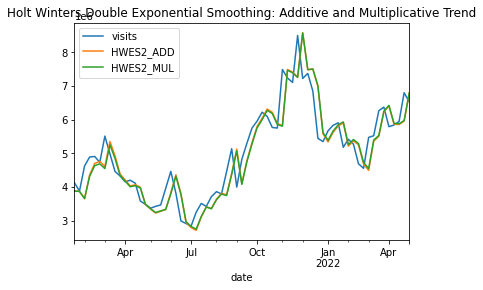

In [ ]:
df['HWES2_ADD'] = ExponentialSmoothing(df['visits'],trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['visits'],trend='mul').fit().fittedvalues
df[['visits','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


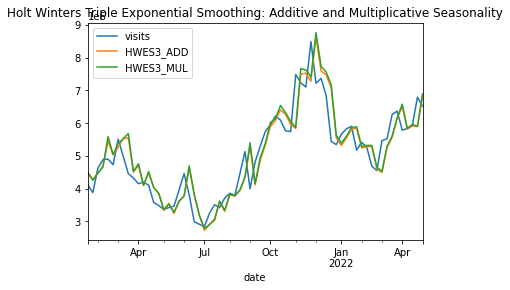

In [ ]:
df['HWES3_ADD'] = ExponentialSmoothing(df['visits'],trend='add',seasonal='add',seasonal_periods=2).fit().fittedvalues
df['HWES3_MUL'] = ExponentialSmoothing(df['visits'],trend='mul',seasonal='mul',seasonal_periods=2).fit().fittedvalues
df[['visits','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

In [ ]:
forecast_data = pd.read_csv('/content/test_overall.csv',index_col='date',parse_dates=True)
forecast_data.index.freq = 'W-FRI'

# Split into train and test set
train_df = df
test_df = forecast_data

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

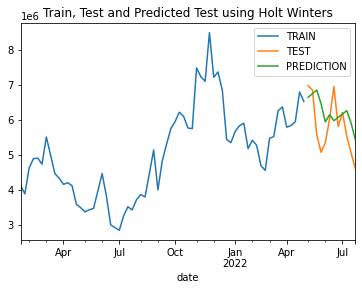

In [ ]:
fitted_model = ExponentialSmoothing(train_df['visits'],trend='mul',seasonal='mul',seasonal_periods=7).fit()
test_predictions = fitted_model.forecast(12)
train_df['visits'].plot(legend=True,label='TRAIN')
test_df['visits'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

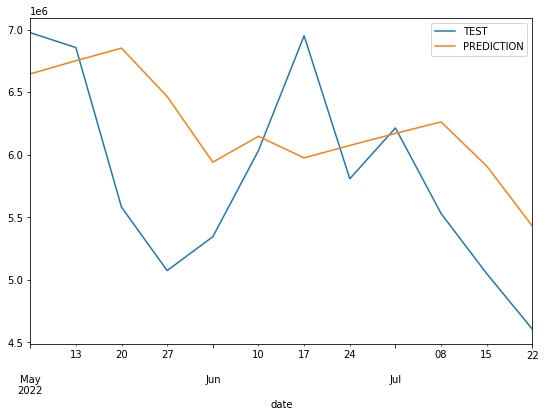

In [ ]:
test_df['visits'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION');

In [ ]:
df_forecast = pd.DataFrame(test_predictions)
df_forecast

,0
2022-05-06,6.645799e+06
2022-05-13,6.750949e+06
2022-05-20,6.851747e+06
2022-05-27,6.465155e+06
2022-06-03,5.940022e+06
2022-06-10,6.146305e+06
2022-06-17,5.974275e+06
2022-06-24,6.073596e+06
2022-07-01,6.169692e+06
2022-07-08,6.261811e+06


# TASK #2: IMPORT LIBRARIES AND DATASET

- You must install fbprophet package as follows: 
     pip install fbprophet
     
- If you encounter an error, try: 
    conda install -c conda-forge fbprophet



In [ ]:
#pip install fbprophet

In [ ]:
 # import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from prophet import Prophet



In [ ]:
# dataframes creation for both training and testing datasets 
df = pd.read_csv("/content/train_overall.csv")

In [ ]:
df

,date,visits
0,1/22/2021,4122038.0
1,1/29/2021,3878332.0
2,2/5/2021,4623054.0
3,2/12/2021,4888239.0
4,2/19/2021,4903506.0
...,...,...
75,NaN,NaN
76,NaN,NaN
77,NaN,NaN
78,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    67 non-null     object 
 1   visits  67 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
df

,date,visits
0,1/22/2021,4122038.0
1,1/29/2021,3878332.0
2,2/5/2021,4623054.0
3,2/12/2021,4888239.0
4,2/19/2021,4903506.0
...,...,...
75,NaN,NaN
76,NaN,NaN
77,NaN,NaN
78,NaN,NaN


In [ ]:
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y')
df =df.sort_values('date')

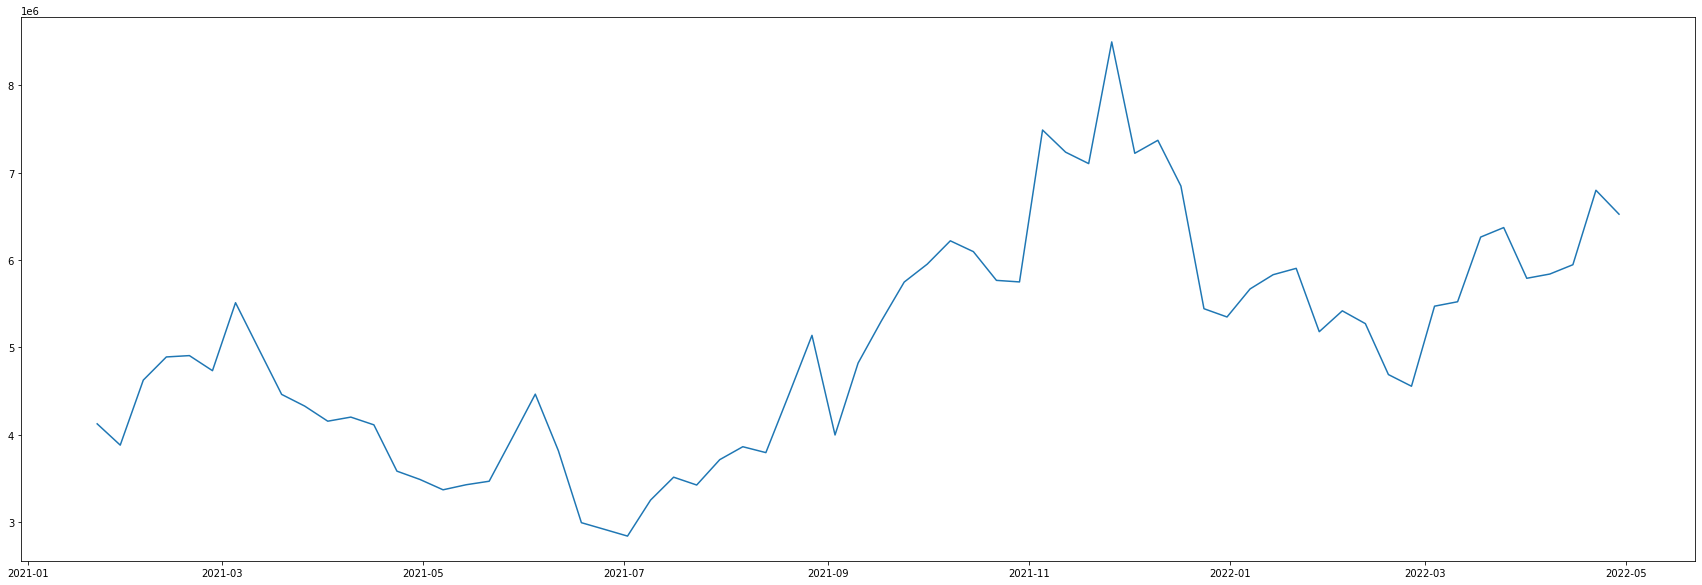

In [ ]:
# Plot date and average price
plt.figure(figsize = (30,10))
plt.plot(df['date'], df['visits'])
#plt.plot(df['date'], df['costs'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


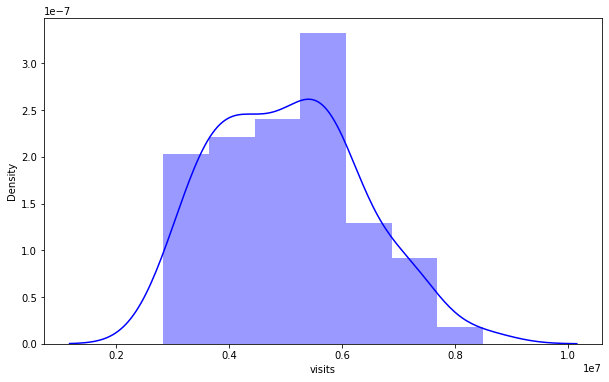

In [ ]:
# Plot distribution of the average price
plt.figure(figsize =(10,6))
sns.distplot(df['visits'], color = 'b')

# TASK 4: PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL 

In [ ]:
df_train = df 

In [ ]:
df_train

,date,visits
0,2021-01-22,4122038.0
1,2021-01-29,3878332.0
2,2021-02-05,4623054.0
3,2021-02-12,4888239.0
4,2021-02-19,4903506.0
...,...,...
75,NaT,NaN
76,NaT,NaN
77,NaT,NaN
78,NaT,NaN


In [ ]:
# dataframes creation for both training and testing datasets 
df_test = pd.read_csv("/content/test_overall.csv")
df_test['date'] =  pd.to_datetime(df_test['date'], format='%m/%d/%Y')
df_test =df_test.sort_values('date')

In [ ]:
df_test

,date,visits
0,2022-05-06,6975545
1,2022-05-13,6856494
2,2022-05-20,5579881
3,2022-05-27,5072812
4,2022-06-03,5343532
5,2022-06-10,6032849
6,2022-06-17,6950765
7,2022-06-24,5806968
8,2022-07-01,6213496
9,2022-07-08,5529186


In [ ]:
df_test.rename(columns = {'visits' : 'y', 'date' : 'ds'}, inplace =True)
df_train.rename(columns = {'visits' : 'y', 'date' : 'ds'}, inplace =True)

# TASK 6: DEVELOP MODEL AND MAKE PREDICTIONS - PART A

In [ ]:
m = Prophet(interval_width=0.9)
m.fit(df_train)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxaelq4lp/0diwshdc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxaelq4lp/lhr6ojms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8559', 'data', 'file=/tmp/tmpxaelq4lp/0diwshdc.json', 'init=/tmp/tmpxaelq4lp/lhr6ojms.json', 'output', 'file=/tmp/tmpa8x_n6_d/prophet_model-20220825163037.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:30:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:30:37 - cmdstanpy - INFO - Chain [1] done processing
IN

In [ ]:
m.params

OrderedDict([('lp__', array([[109.676]])),
             ('k', array([[0.31509]])),
             ('m', array([[0.435096]])),
             ('delta',
              array([[-5.36702e-11,  1.15154e-10,  8.14515e-11,  1.84848e-10,
                       1.13007e-10, -6.23473e-11,  5.23063e-06,  6.05258e-05,
                       7.51243e-06,  1.75496e-05, -4.71359e-11,  1.66114e-04,
                       6.24421e-11,  2.61735e-10,  1.88173e-10, -7.78345e-11,
                       2.30158e-11, -2.19695e-11, -2.50405e-10, -1.21829e-10,
                      -6.74808e-11, -4.30824e-08, -1.71580e-10, -2.20149e-10,
                      -1.00452e-10]])),
             ('sigma_obs', array([[0.117864]])),
             ('beta', array([[1.44942e-15]])),
             ('trend',
              array([[0.435096, 0.43987 , 0.444645, 0.449419, 0.454193, 0.458967,
                      0.463741, 0.468515, 0.473289, 0.478063, 0.482837, 0.487611,
                      0.492385, 0.49716 , 0.501934, 0.506708, 

In [ ]:
df_test_2 =df_test[['ds']]
df_test_2

,ds
0,2022-05-06
1,2022-05-13
2,2022-05-20
3,2022-05-27
4,2022-06-03
5,2022-06-10
6,2022-06-17
7,2022-06-24
8,2022-07-01
9,2022-07-08


In [ ]:
# Forcasting into the future
forecast =m.predict(df_test_2)
forecast=forecast[['ds','yhat']]
forecast

,ds,yhat
0,2022-05-06,6.415683e+06
1,2022-05-13,6.456277e+06
2,2022-05-20,6.496872e+06
3,2022-05-27,6.537466e+06
4,2022-06-03,6.578060e+06
5,2022-06-10,6.618654e+06
6,2022-06-17,6.659248e+06
7,2022-06-24,6.699843e+06
8,2022-07-01,6.740437e+06
9,2022-07-08,6.781031e+06


In [ ]:
final_df = pd.concat((forecast['yhat'],df_test),axis =1)
final_df

,yhat,ds,y
0,6.415683e+06,2022-05-06,6975545
1,6.456277e+06,2022-05-13,6856494
2,6.496872e+06,2022-05-20,5579881
3,6.537466e+06,2022-05-27,5072812
4,6.578060e+06,2022-06-03,5343532
5,6.618654e+06,2022-06-10,6032849
6,6.659248e+06,2022-06-17,6950765
7,6.699843e+06,2022-06-24,5806968
8,6.740437e+06,2022-07-01,6213496
9,6.781031e+06,2022-07-08,5529186


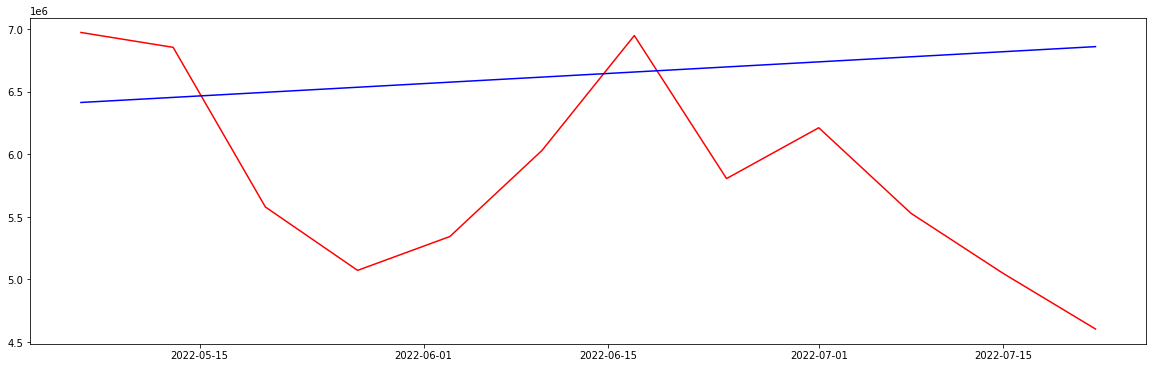

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(final_df['ds'],final_df['y'], color = 'red', label = 'actual')
plt.plot(final_df['ds'],final_df['yhat'], color = 'blue', label = 'forecast')